TensorFlow version: 2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 84ms/step - accuracy: 0.8206 - loss: 0.6330 - val_accuracy: 0.9763 - val_loss: 0.0832
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9756 - loss: 0.0817 - val_accuracy: 0.9852 - val_loss: 0.0571
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9828 - loss: 0.0580 - val_accuracy: 0.9870 - val_loss: 0.0464
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.9877 - val_loss: 0.0432
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9887 - val_loss: 0.0422
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9928 - loss: 0.0243 - 

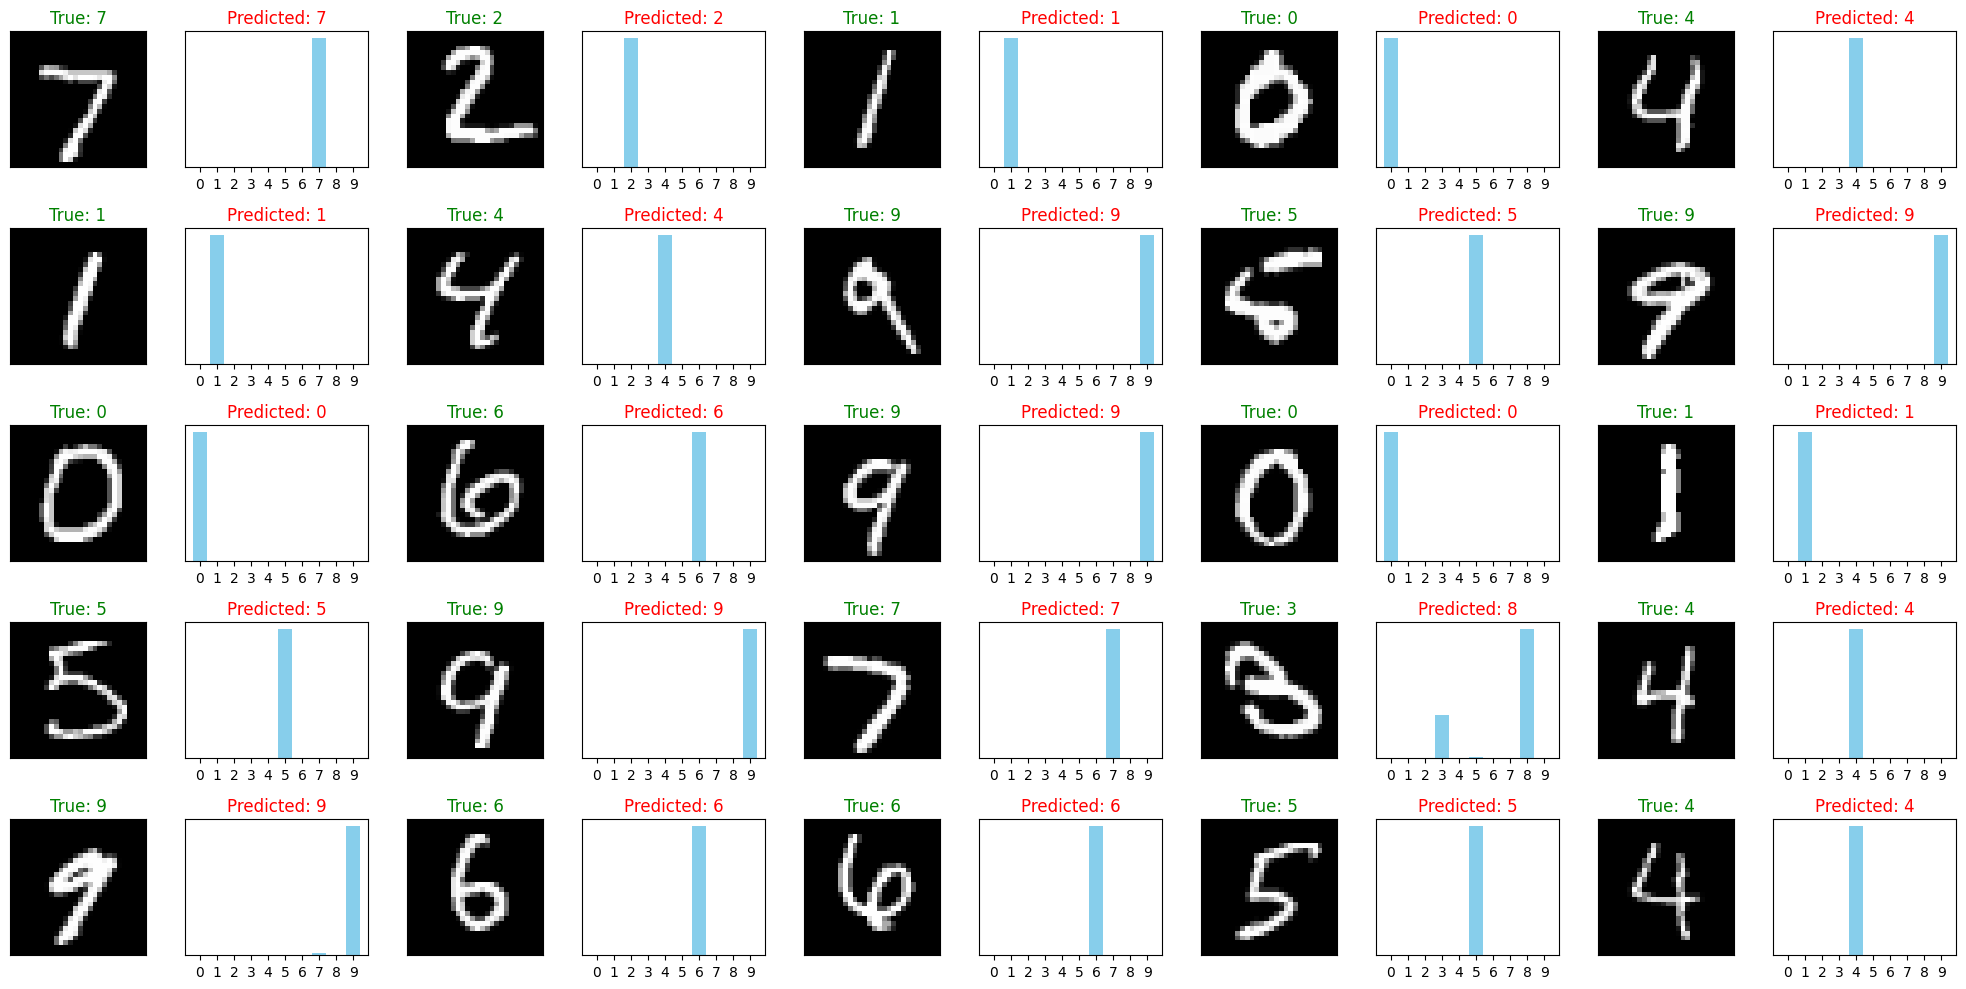


Model saved as mnist_cnn_model.h5


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
train_labels_encoded = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_encoded = keras.utils.to_categorical(test_labels, num_classes=10)

# Build the Convolutional Neural Network (CNN) Model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\nModel Summary:")
model.summary()

# Train the CNN Model
epochs = 10
batch_size = 128
history = model.fit(train_images, train_labels_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the Model
loss, accuracy = model.evaluate(test_images, test_labels_encoded, verbose=0)
print(f'\nTest Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make Predictions and Visualize
predictions = model.predict(test_images)
num_rows = 5
num_cols = 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"True: {test_labels[i]}", color='g')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(np.arange(10), predictions[i], color='skyblue')
    plt.xticks(np.arange(10))
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Predicted: {predicted_label}", color='r')
plt.tight_layout()
plt.show()

# Save the Model
model.save('mnist_cnn_model.h5')
print("\nModel saved as mnist_cnn_model.h5")